In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2024-05-19 11:07:40.662499: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step 
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 45s 2us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step


In [5]:
# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [7]:
# Build the CNN model
model = models.Sequential([     
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),     
    layers.MaxPooling2D((2, 2)),     
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)),     
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.Flatten(), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(10) ])


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 744s 375ms/step - accuracy: 0.7386 - loss: 0.7114 - val_accuracy: 0.8662 - val_loss: 0.3818
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 429s 208ms/step - accuracy: 0.8756 - loss: 0.3397 - val_accuracy: 0.8711 - val_loss: 0.3532
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 225s 92ms/step - accuracy: 0.8952 - loss: 0.2858 - val_accuracy: 0.8946 - val_loss: 0.2944
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.9091 - loss: 0.2455 - val_accuracy: 0.9011 - val_loss: 0.2726
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9155 - loss: 0.2258 - val_accuracy: 0.9017 - val_loss: 0.2671
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9264 - loss: 0.1990 - val_accuracy: 0.9092 - val_loss: 0.2576
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9331 - loss: 0.1782 - val_accuracy: 0.9079 - val_loss: 0.2745
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9

In [11]:
import numpy as np
# Make predictions on test images
test_images = test_images[..., np.newaxis] 
# Add channel dimension
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [12]:
# Function to plot the image and prediction
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[..., 0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'


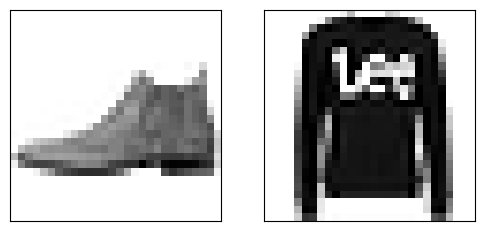

In [13]:
# Plot the first 2 test images with predictions
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(6,3))
for i in range(2):
    plt.subplot(1,2,i+1)
    plot_image(i, predictions, test_labels, test_images)
plt.show()